<a href="https://colab.research.google.com/github/kenzaaallouche/Andromede-app/blob/main/isis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 782.8/782.8 kB 7.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [1]:
#!pip install roboflow

In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="KFRU55MFH8DYV5mu1EDh")
project = rf.workspace("bingovissel-fcfyn").project("liquide-vaisselle")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to LIQUIDE-VAISSELLE-1 in yolov8:: 100%|██████████| 952/952 [00:00<00:00, 3932.08it/s]


In [5]:
from roboflow import Roboflow
from ultralytics import YOLO

In [6]:
model = YOLO('yolov8n.pt')  # Assurez-vous que yolov8n.pt est bien dans le répertoire courant

# Définir le chemin vers les données téléchargées
data_path = dataset.location

100%|██████████| 6.23M/6.23M [00:00<00:00, 129MB/s]


In [14]:
!yolo task=detec mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=100 imgsz=640

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 538, in entrypoint
    raise ValueError(f"Invalid 'task={task}'. Valid tasks are {TASKS}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'task=detec'. Valid tasks are {'obb', 'classify', 'segment', 'pose', 'detect'}.

    Arguments received: ['yolo', 'task=detec', 'mode=train', 'model=yolov8n.pt', 'data=/content/LIQUIDE-VAISSELLE-1/data.yaml', 'epochs=100', 'imgsz=640']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'obb', 'classify', 'segment', 'pose', 'detect'}
                MODE (required) is one of {'train', 'track', 'val', 'benchmark', 'export', 'predict'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://doc

In [15]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 plots=True

[Errno 2] No such file or directory: '{HOME}'
/content
100% 21.5M/21.5M [00:00<00:00, 261MB/s]
Ultralytics YOLOv8.2.35 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/LIQUIDE-VAISSELLE-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, 

In [17]:
from IPython.display import display, Image

In [24]:
import os
HOME = os.getcwd()
print(HOME)


/content


/content


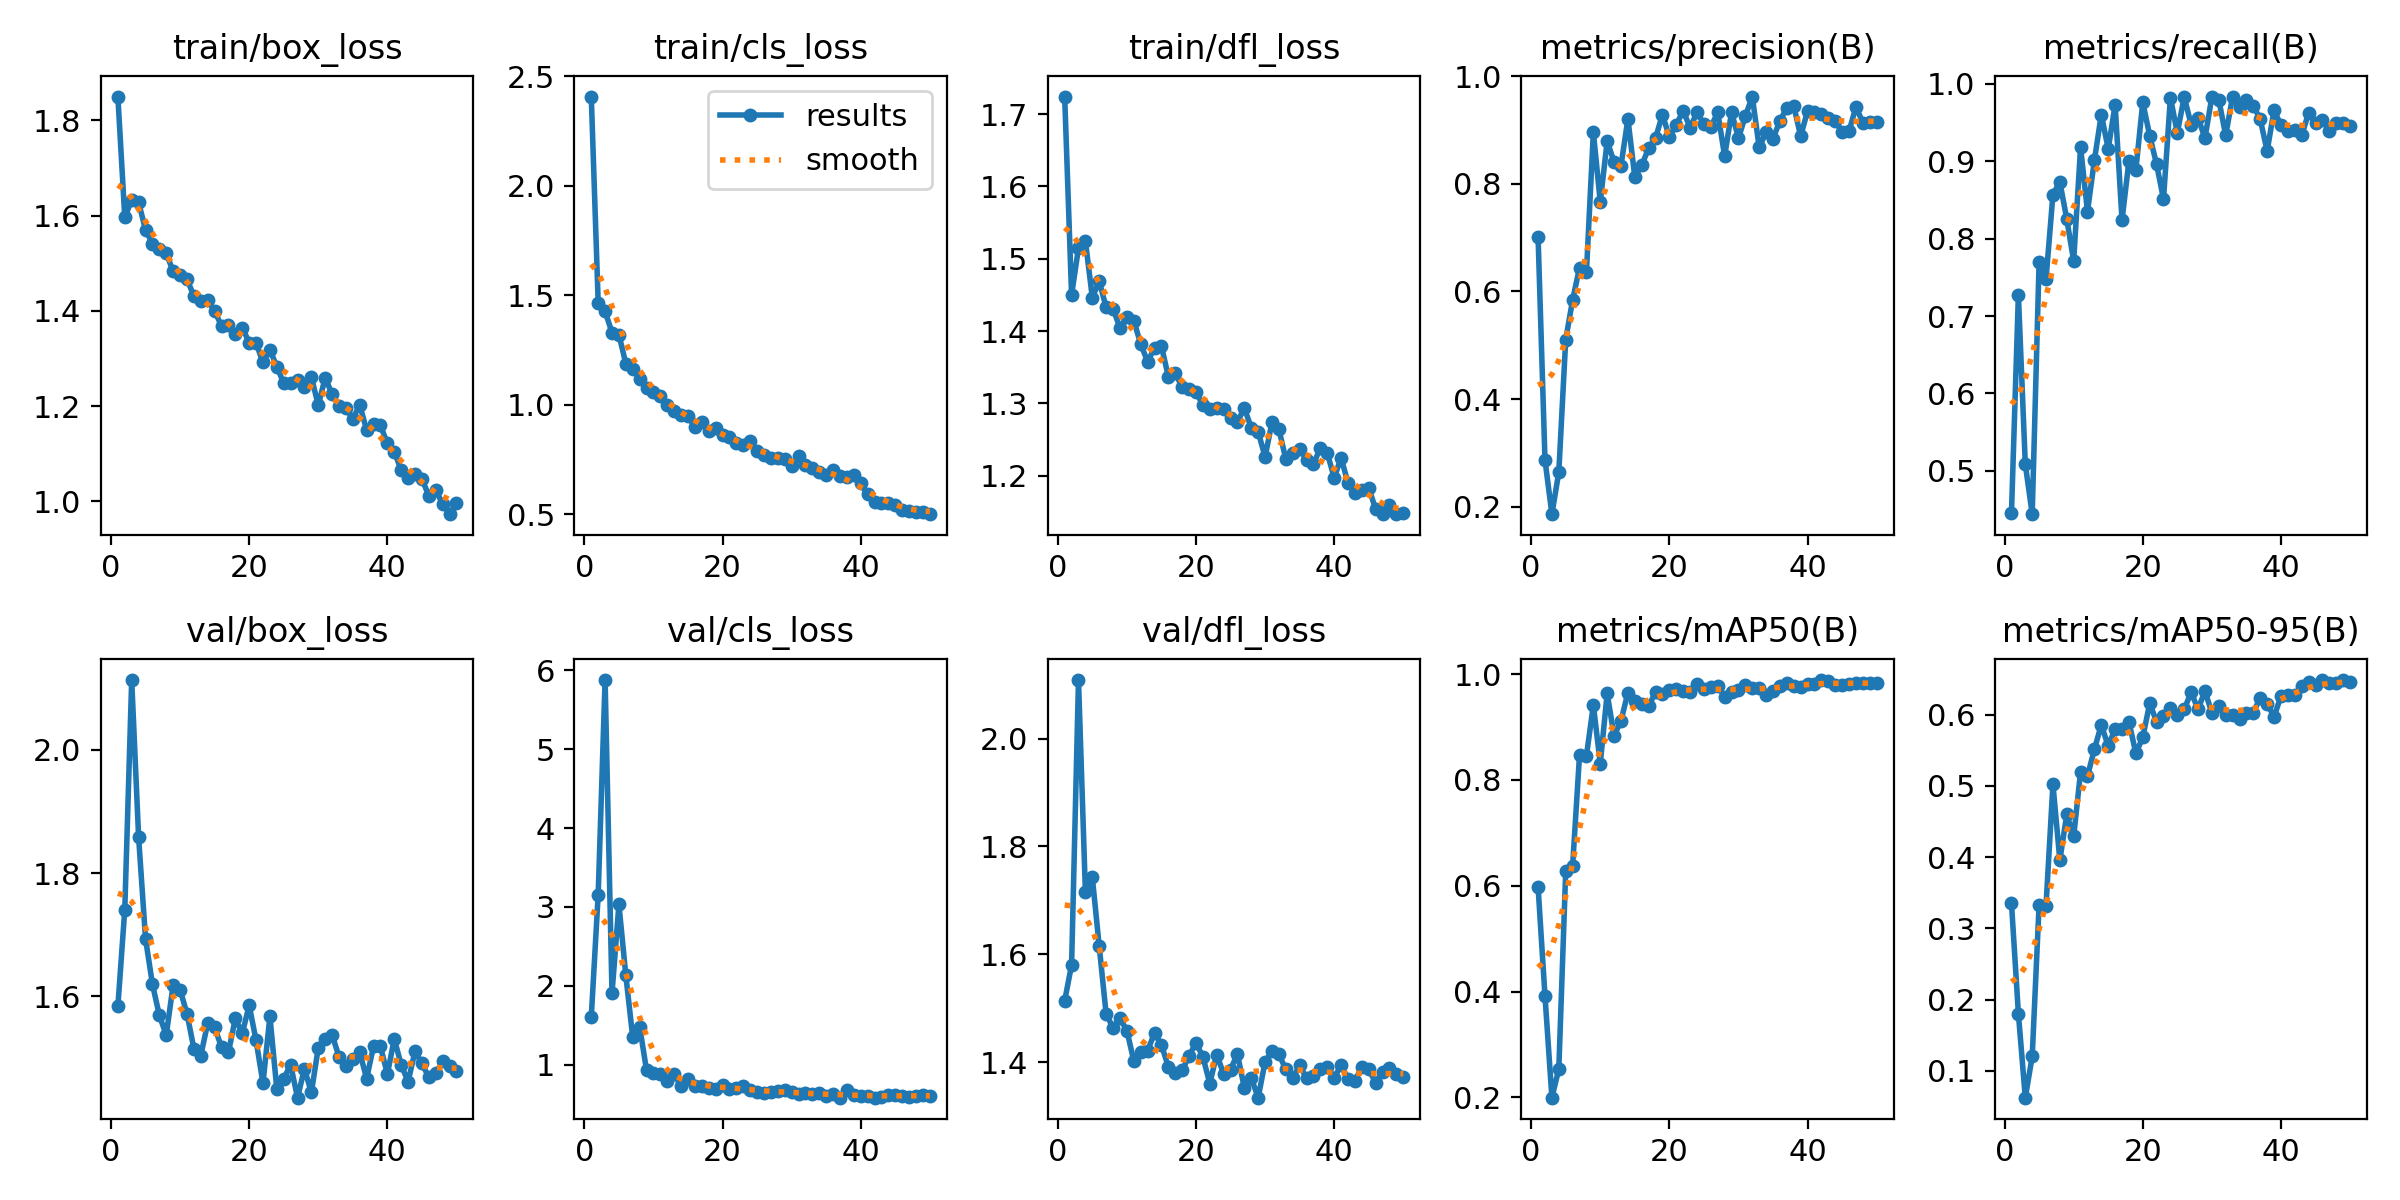

In [26]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train6/results.png', width=600)

/content


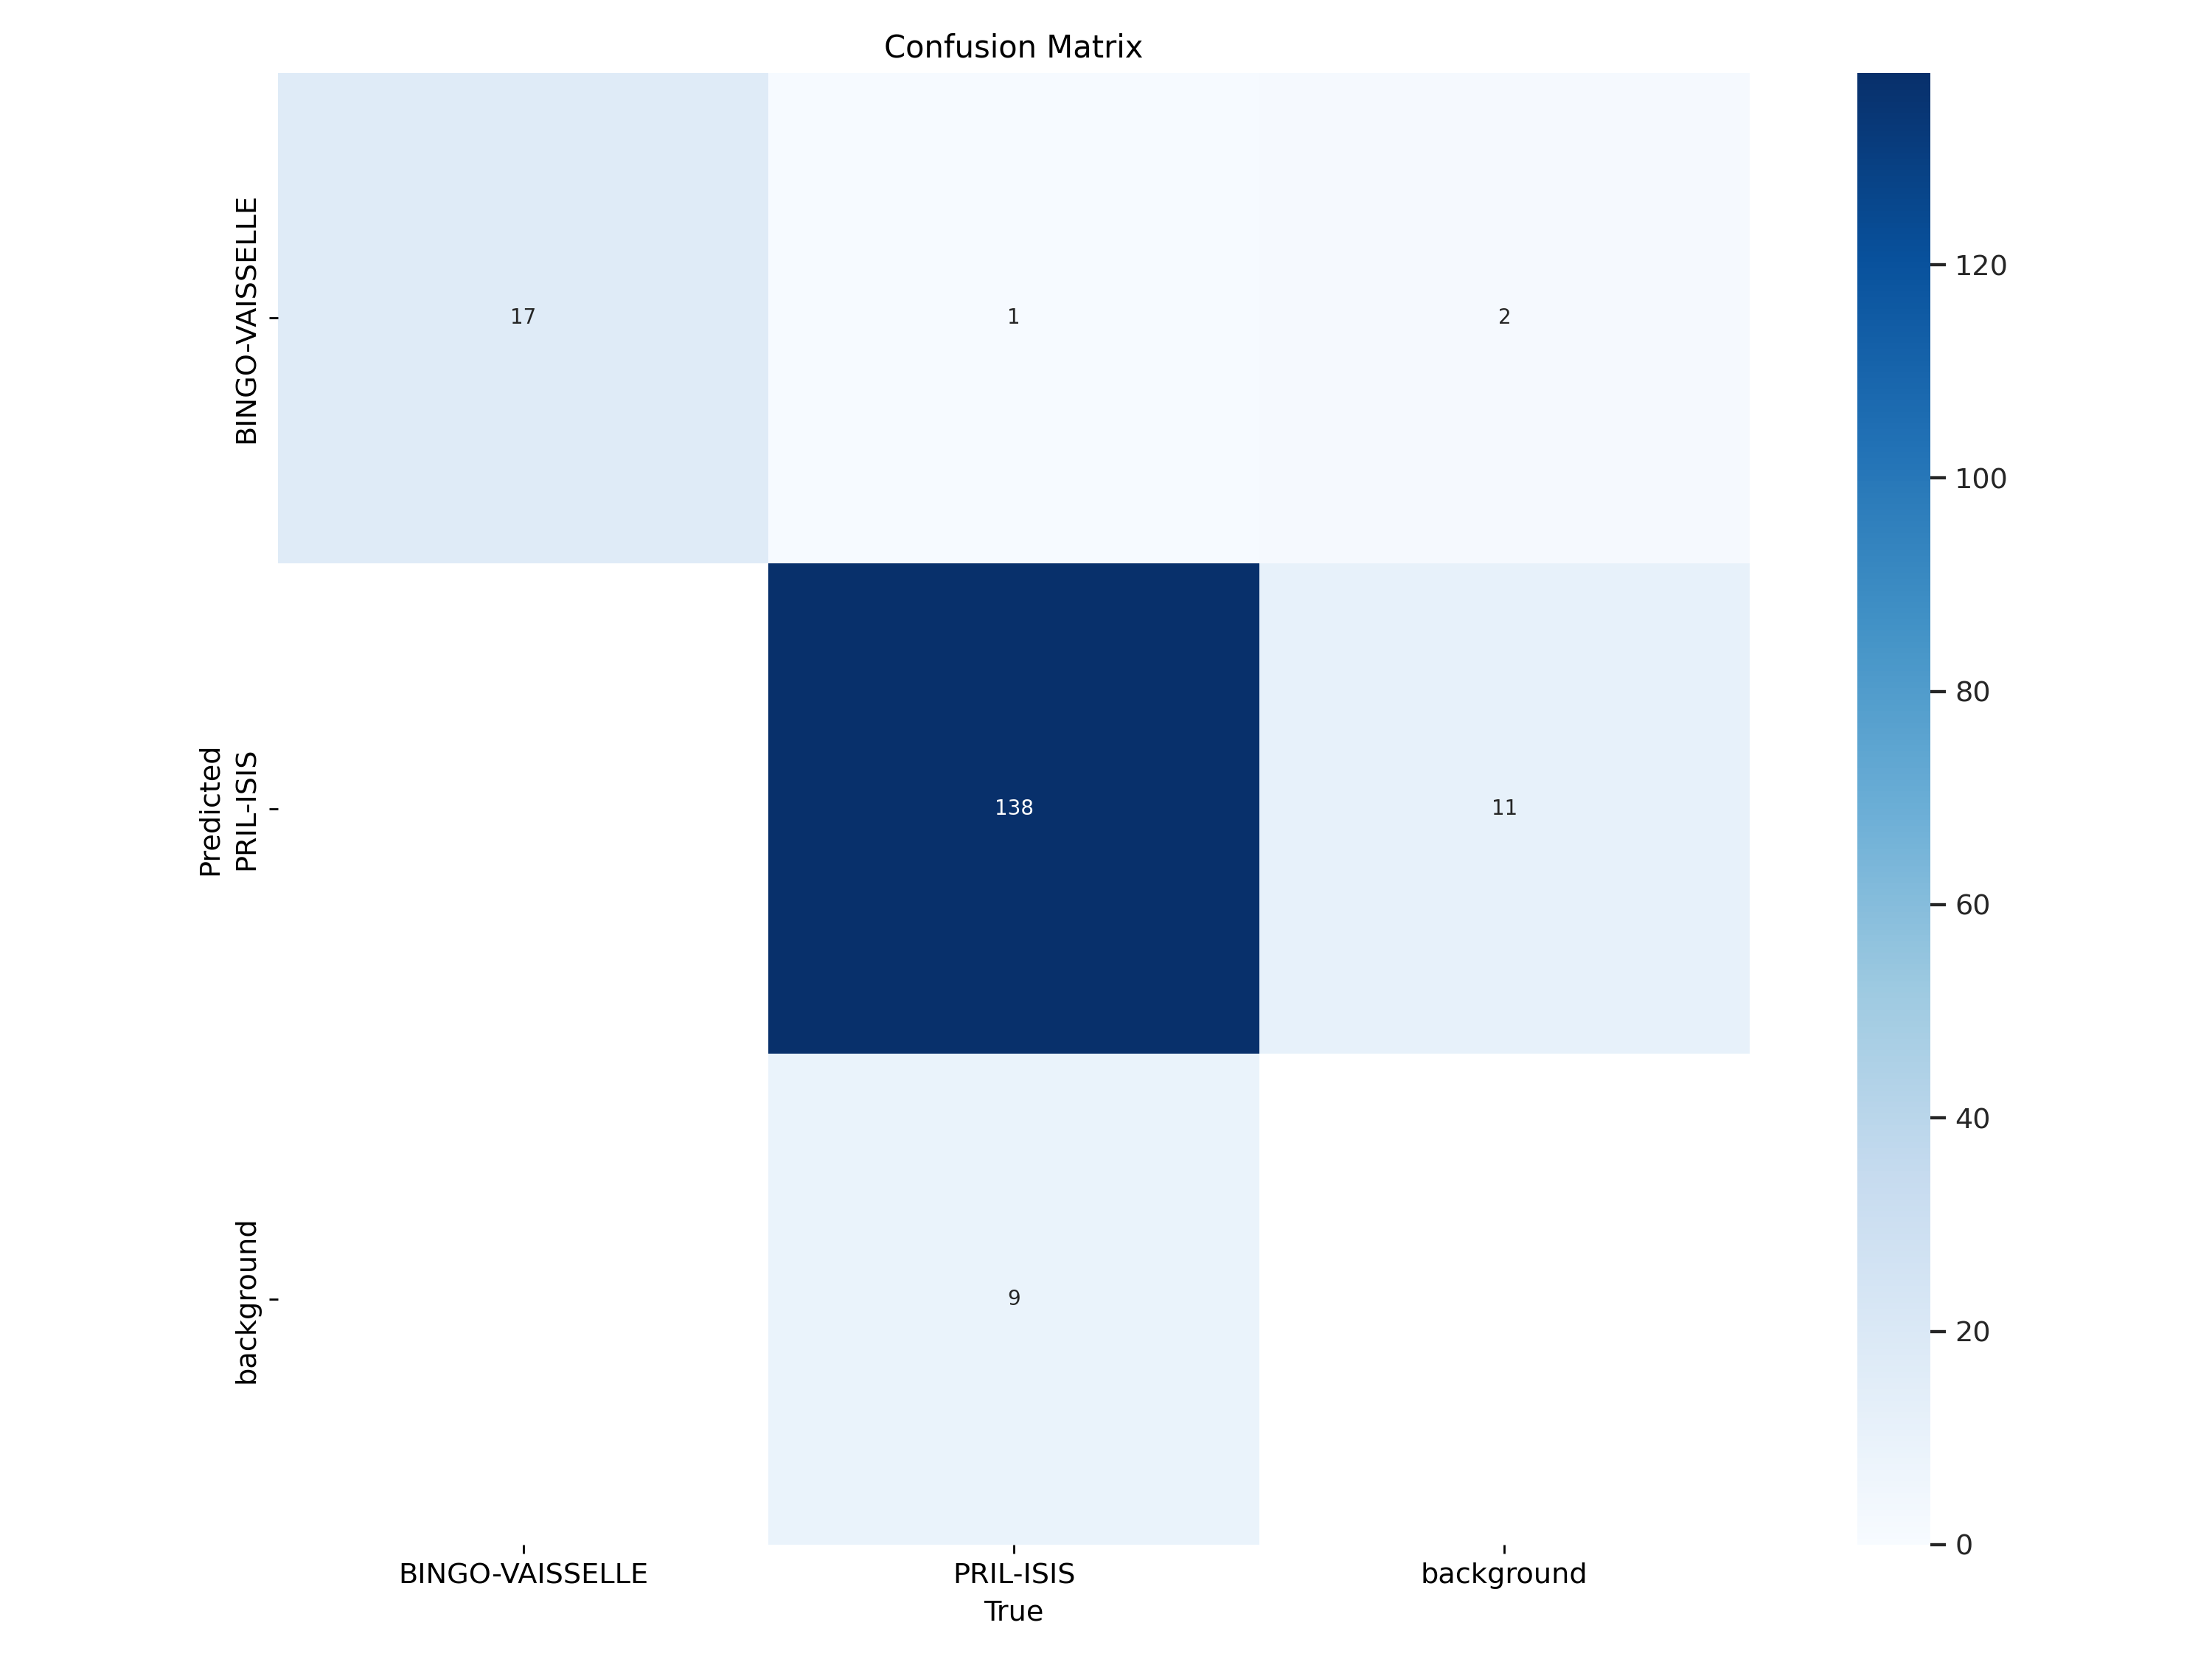

In [28]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train6/confusion_matrix.png', width=600)

/content


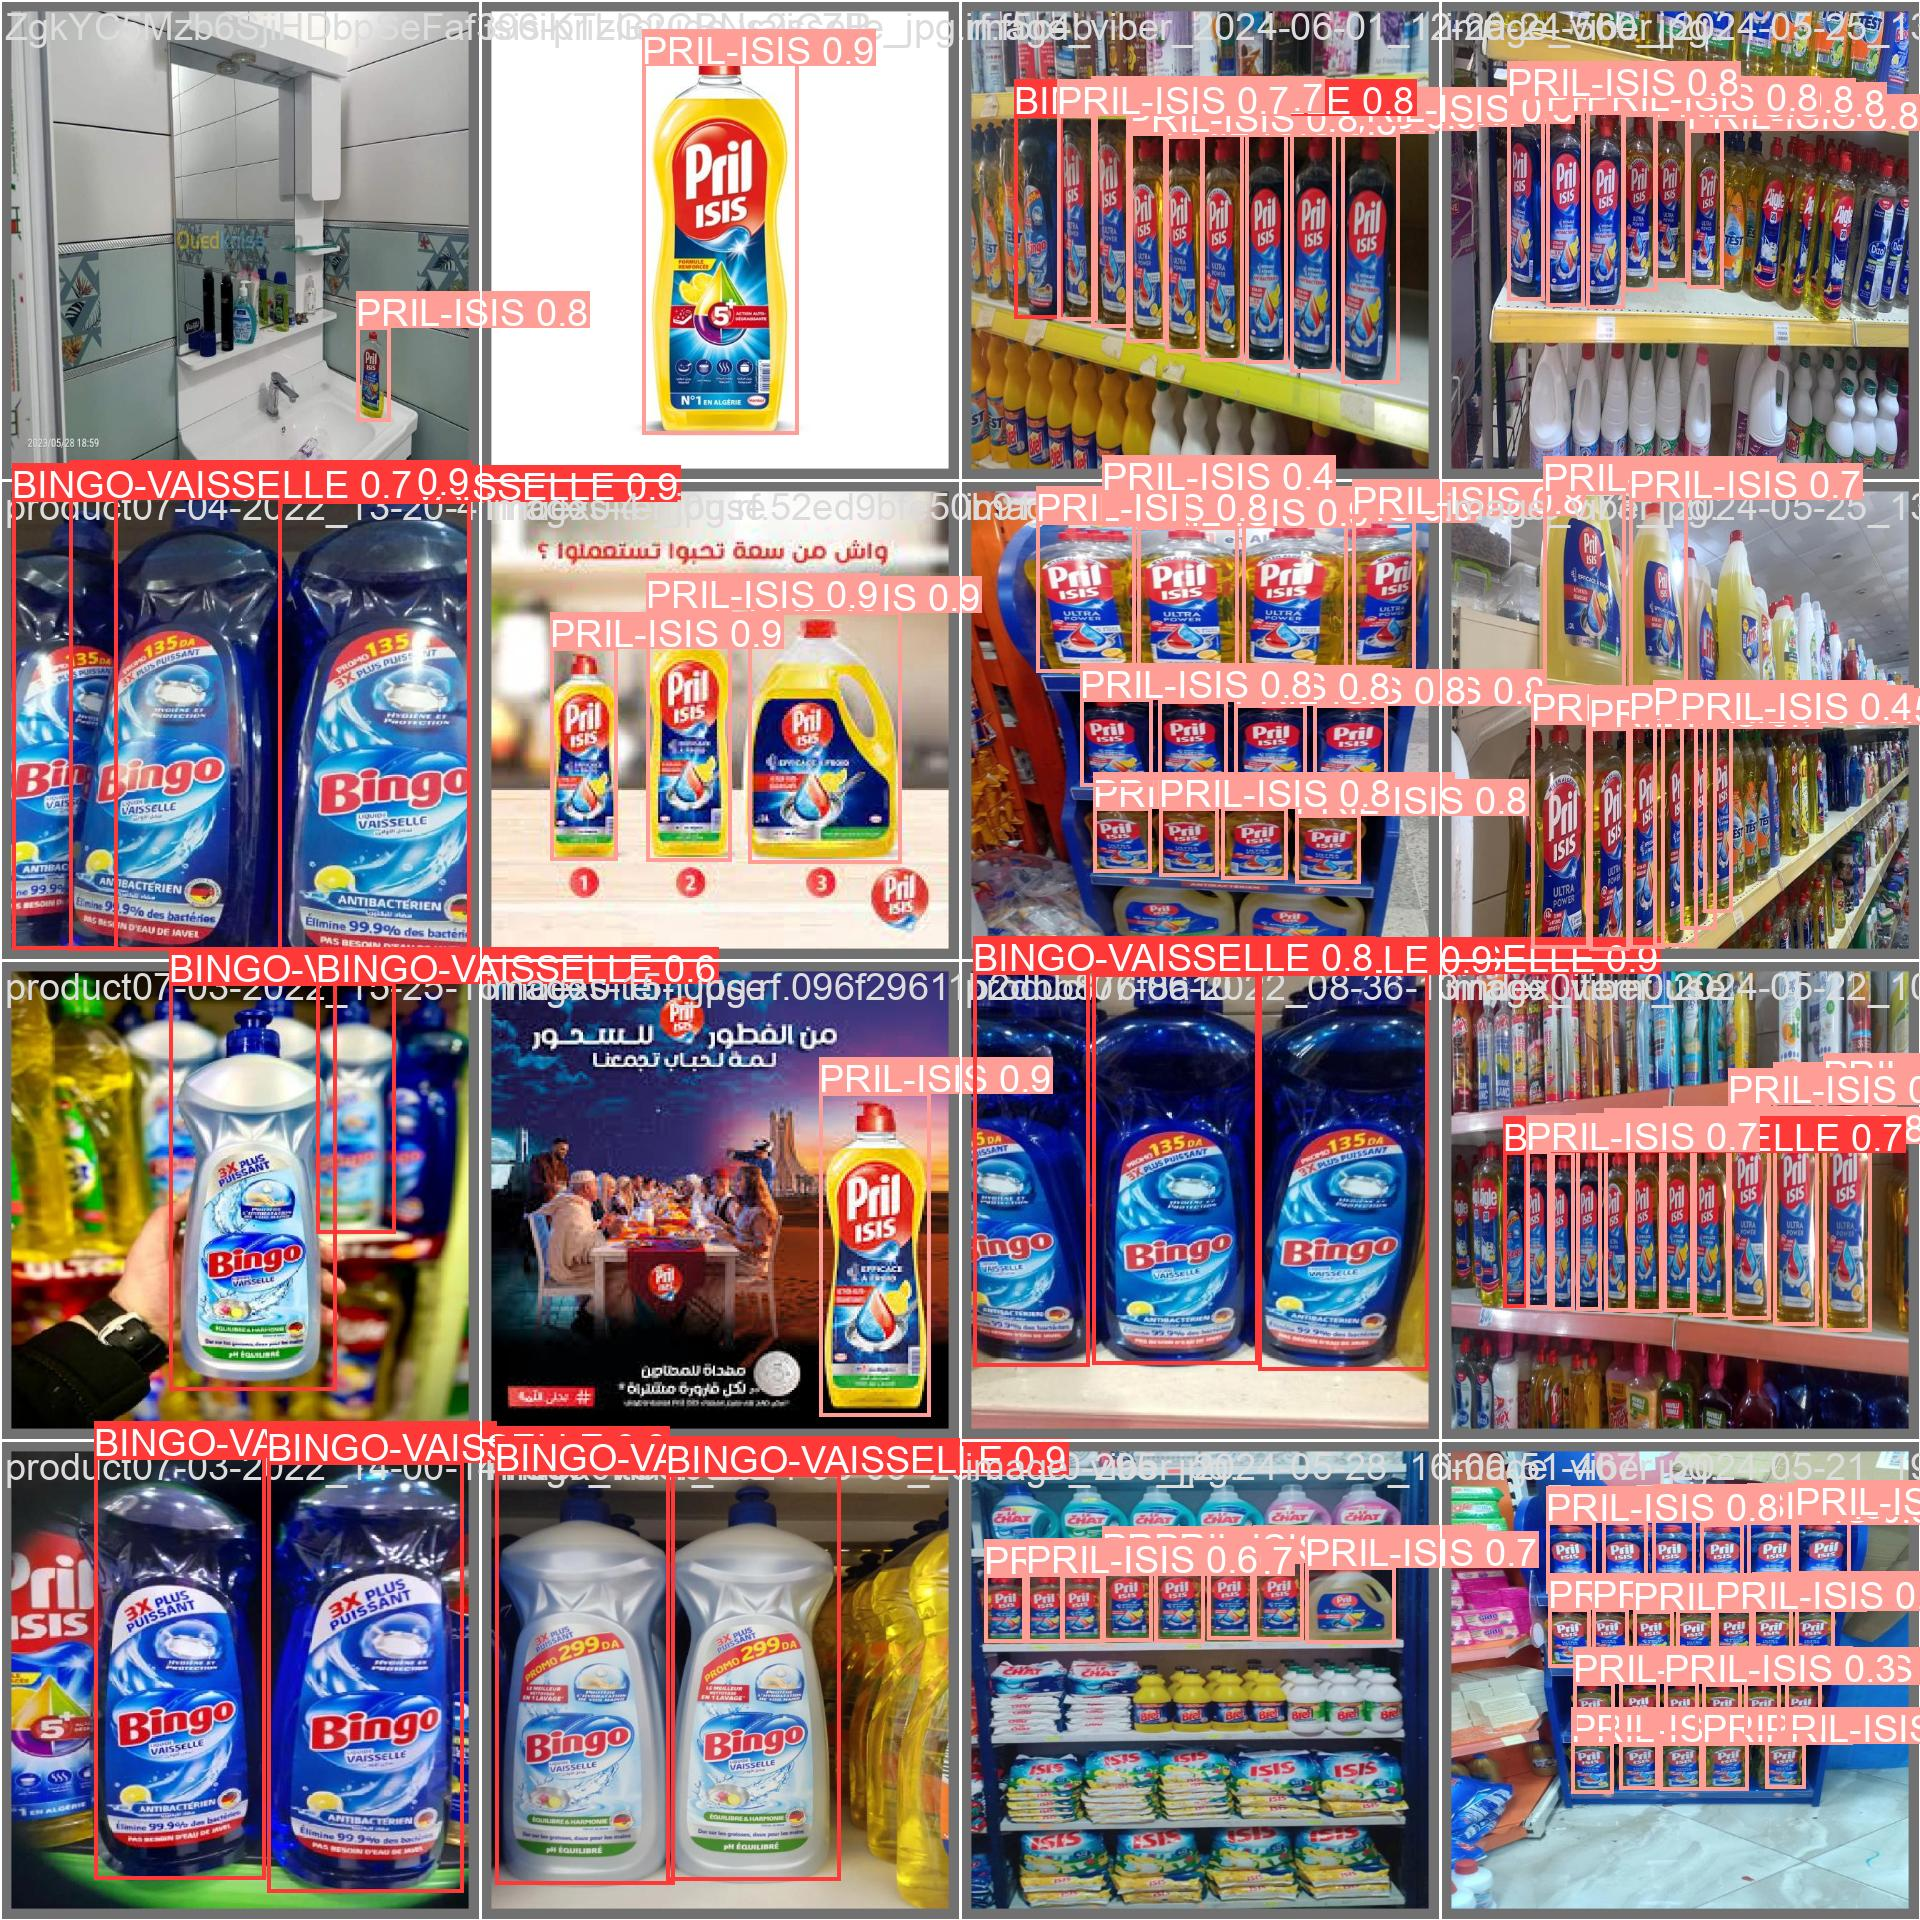

In [29]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train6/val_batch0_pred.jpg', width=600)

In [30]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train6/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.35 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/LIQUIDE-VAISSELLE-1/valid/labels.cache... 23 images, 0 backgrounds, 0 corrupt: 100% 23/23 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.37it/s]
                   all         23        165      0.914       0.95      0.983      0.648
       BINGO-VAISSELLE          8         17      0.885          1      0.995       0.74
             PRIL-ISIS         18        148      0.943        0.9      0.971      0.555
Speed: 0.2ms preprocess, 21.4ms inference, 0.0ms loss, 25.7ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [31]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train6/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.35 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

image 1/9 /content/LIQUIDE-VAISSELLE-1/test/images/image_viber_2024-05-21_11-27-47-386_jpg.rf.24277a0b26ef6ae6f5f16917f0d2ad58.jpg: 640x640 8 PRIL-ISISs, 16.5ms
image 2/9 /content/LIQUIDE-VAISSELLE-1/test/images/image_viber_2024-05-21_19-13-15-318_jpg.rf.e60349c4decf811ba80ef1b162fd4926.jpg: 640x640 11 PRIL-ISISs, 16.3ms
image 3/9 /content/LIQUIDE-VAISSELLE-1/test/images/image_viber_2024-05-28_08-40-27-363_jpg.rf.6f5484fe8d63cb682d4fb6b30bd9b586.jpg: 640x640 12 PRIL-ISISs, 16.3ms
image 4/9 /content/LIQUIDE-VAISSELLE-1/test/images/image_viber_2024-05-30_17-36-35-406_jpg.rf.15590486678d1c2e598b4165a4656bbf.jpg: 640x640 2 BINGO-VAISSELLEs, 7 PRIL-ISISs, 16.3ms
image 5/9 /content/LIQUIDE-VAISSELLE-1/test/images/images-13-_jpg.rf.21880c808eb22a863d40f602790dc734.jpg: 640x640 1 PRIL-ISIS, 16.4ms
image 6/9 /content/LI

In [33]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [35]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train6/weights/best.pt conf=0.25 source='https://cdn7.ouedkniss.com/1600/medias/announcements/images/27403158/Photo7.jpg'

/content
Ultralytics YOLOv8.2.35 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

100% 169k/169k [00:00<00:00, 301kB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
image 1/1 /content/Photo7.jpg: 640x480 1 BINGO-VAISSELLE, 1 PRIL-ISIS, 100.9ms
Speed: 4.0ms preprocess, 100.9ms inference, 638.1ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict
